In [ ]:
# This program uses the moving average convergence/divergence (MACD) crossover to determine when to buy and sell stocks.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
from pandas.core.indexes.datetimes import DatetimeIndex
#Storing the data in a dataframe
df = pd.read_csv('AAPL.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Taking just first 90 days
df = df[60:120]
df



,Date,Open,High,Low,Close,Adj Close,Volume
2017-03-30,2017-03-30,36.047501,36.125000,35.875000,35.982498,33.923393,84829200
2017-03-31,2017-03-31,35.930000,36.067501,35.752499,35.915001,33.859753,78646800
2017-04-03,2017-04-03,35.927502,36.029999,35.762501,35.924999,33.869183,79942800
2017-04-04,2017-04-04,35.812500,36.222500,35.792500,36.192501,34.121380,79565600
2017-04-05,2017-04-05,36.055000,36.365002,35.952499,36.005001,33.944611,110871600
2017-04-06,2017-04-06,36.072498,36.130001,35.862499,35.915001,33.859753,84596000
2017-04-07,2017-04-07,35.932499,36.044998,35.817501,35.834999,33.784325,66688800
2017-04-10,2017-04-10,35.900002,35.970001,35.724998,35.792500,33.744267,75733600
2017-04-11,2017-04-11,35.735001,35.837502,35.014999,35.407501,33.381302,121517600
2017-04-12,2017-04-12,35.400002,35.537498,35.252499,35.450001,33.421364,81400000


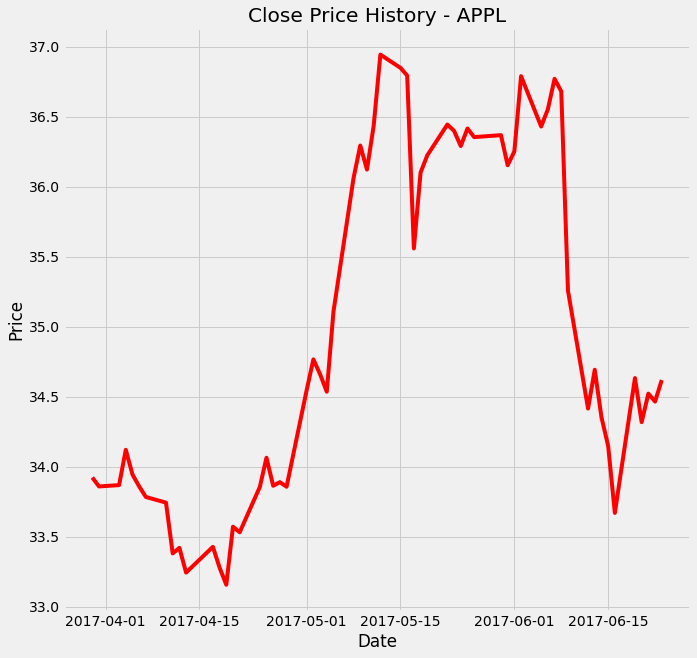

In [ ]:
# Visually show the stock price

plt.figure(figsize=(10,10))
plt.plot(df['Adj Close'], label='Close', color='r')
plt.title('Close Price History - APPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Calculating the MACD and signal line indicators
# Short term EMA
shortEMA = df.Close.ewm(span=12, adjust=False).mean()

# Long Term EMA
longEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculating the MACD line
MACD = shortEMA - longEMA

# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

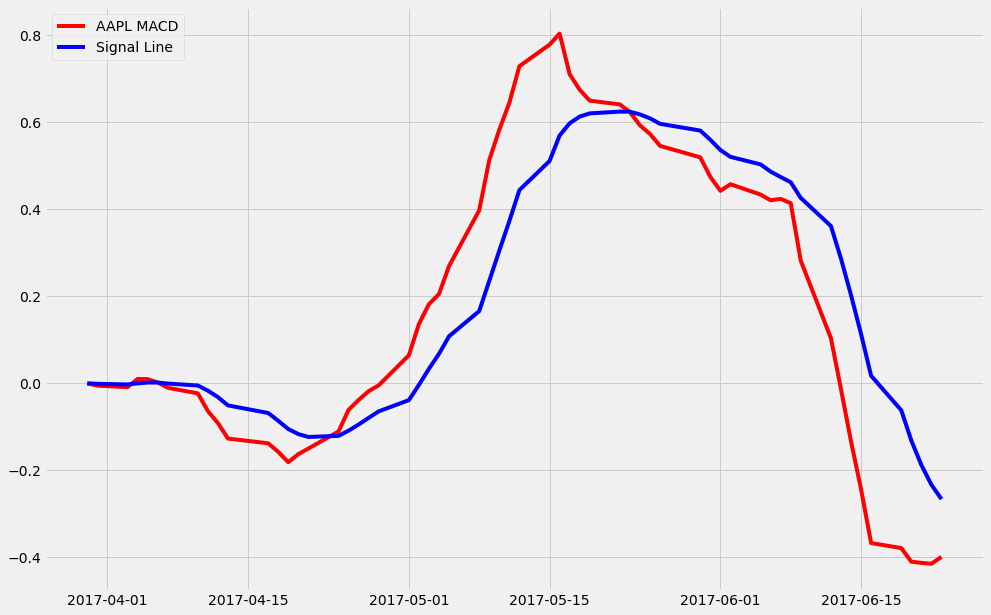

In [ ]:
#Plot the chart
plt.figure(figsize=(15,10))
plt.plot(df.index, MACD, label='AAPL MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Creating new columns for the data

df['MACD'] = MACD
df['Signal Line'] = signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2017-03-30,2017-03-30,36.047501,36.125000,35.875000,35.982498,33.923393,84829200,0.000000,0.000000
2017-03-31,2017-03-31,35.930000,36.067501,35.752499,35.915001,33.859753,78646800,-0.005384,-0.001077
2017-04-03,2017-04-03,35.927502,36.029999,35.762501,35.924999,33.869183,79942800,-0.008744,-0.002610
2017-04-04,2017-04-04,35.812500,36.222500,35.792500,36.192501,34.121380,79565600,0.010063,-0.000076
2017-04-05,2017-04-05,36.055000,36.365002,35.952499,36.005001,33.944611,110871600,0.009725,0.001885
2017-04-06,2017-04-06,36.072498,36.130001,35.862499,35.915001,33.859753,84596000,0.002171,0.001942
2017-04-07,2017-04-07,35.932499,36.044998,35.817501,35.834999,33.784325,66688800,-0.010155,-0.000478
2017-04-10,2017-04-10,35.900002,35.970001,35.724998,35.792500,33.744267,75733600,-0.023086,-0.004999
2017-04-11,2017-04-11,35.735001,35.837502,35.014999,35.407501,33.381302,121517600,-0.063667,-0.016733
2017-04-12,2017-04-12,35.400002,35.537498,35.252499,35.450001,33.421364,81400000,-0.091344,-0.031655


In [34]:
# Create a function to signal when to buy and sell an asset

def buy_sell(signal):
  buy = []
  sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      sell.append(np.nan)
      if flag != 1:
        buy.append(signal['Close'][i])
        flag = 1
      else:
        buy.append(np.nan)

    elif signal['MACD'][i] < signal['Signal Line'][i]:
      buy.append(np.nan)
      if flag != 0:
        sell.append(signal['Close'][i])
        flag = 0
      else:
        sell.append(np.nan)
    else:
      buy.append(np.nan)
      sell.append(np.nan)

  return (buy,sell)

In [35]:
# Create a buy and sell column

a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]



In [36]:
# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2017-03-30,2017-03-30,36.047501,36.125000,35.875000,35.982498,33.923393,84829200,0.000000,0.000000,NaN,NaN
2017-03-31,2017-03-31,35.930000,36.067501,35.752499,35.915001,33.859753,78646800,-0.005384,-0.001077,NaN,35.915001
2017-04-03,2017-04-03,35.927502,36.029999,35.762501,35.924999,33.869183,79942800,-0.008744,-0.002610,NaN,NaN
2017-04-04,2017-04-04,35.812500,36.222500,35.792500,36.192501,34.121380,79565600,0.010063,-0.000076,36.192501,NaN
2017-04-05,2017-04-05,36.055000,36.365002,35.952499,36.005001,33.944611,110871600,0.009725,0.001885,NaN,NaN
2017-04-06,2017-04-06,36.072498,36.130001,35.862499,35.915001,33.859753,84596000,0.002171,0.001942,NaN,NaN
2017-04-07,2017-04-07,35.932499,36.044998,35.817501,35.834999,33.784325,66688800,-0.010155,-0.000478,NaN,35.834999
2017-04-10,2017-04-10,35.900002,35.970001,35.724998,35.792500,33.744267,75733600,-0.023086,-0.004999,NaN,NaN
2017-04-11,2017-04-11,35.735001,35.837502,35.014999,35.407501,33.381302,121517600,-0.063667,-0.016733,NaN,NaN
2017-04-12,2017-04-12,35.400002,35.537498,35.252499,35.450001,33.421364,81400000,-0.091344,-0.031655,NaN,NaN


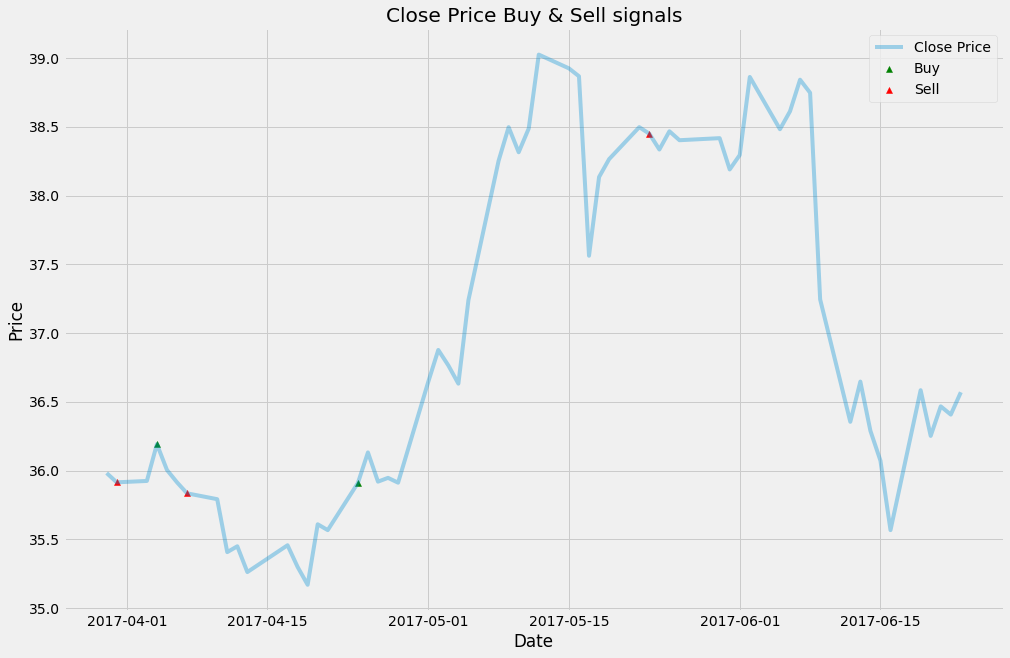

In [39]:
# Visually show the stock buy and sell signals

plt.figure(figsize=(15,10))
plt.scatter(df.index, df['Buy_Signal_Price'], color='g', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='r', label='Sell', marker='^', alpha =1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell signals')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()